## XmR Charts

Based on _Understanding Variation_ by Wheeler. An example process behavior chart is demonstrated below. Deviations above or below the dotted line indicate a signal which should be investigated.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters
import pandas as pd

In [2]:
# Example data
n_points = 20
real_value = 5.0

today = pd.Timestamp.now()
index = pd.date_range(today, periods=n_points, freq="D").normalize()
df = pd.DataFrame(np.random.randn(n_points) + real_value, columns=["data"], index=index)
df.head()

,data
2019-10-12,5.620348
2019-10-13,4.732562
2019-10-14,6.974573
2019-10-15,2.312841
2019-10-16,6.032934


In [3]:
def plot_xmr_chart(dataframe, column, method="average"):
    """Plot the column in the associated dataframe in a process behavior chart. 
    It is assumed the that index of the dataframe is a datetime or timestamp format."""
    register_matplotlib_converters()
    if method in ["average", "mean"]:
        xbar = dataframe[column].mean()
        moving_range = abs(dataframe[column] - dataframe[column].shift(1))
        av_moving_range = moving_range.mean()
        natural_process_const = 2.66
        range_limit_const = 3.27
        unpl = (
            xbar + natural_process_const * av_moving_range
        )  # upper natural process limit
        lnpl = (
            xbar - natural_process_const * av_moving_range
        )  # lower natural process limit
        url = range_limit_const * av_moving_range
        additional_title = " Average"
    elif method == "median":
        xbar = dataframe[column].mean()  # yes, still use average here
        moving_range = abs(dataframe[column] - dataframe[column].shift(1))
        av_moving_range = moving_range.median()  # this is where median happens
        natural_process_const = 3.14
        range_limit_const = 3.87
        unpl = (
            xbar + natural_process_const * av_moving_range
        )  # upper natural process limit
        lnpl = (
            xbar - natural_process_const * av_moving_range
        )  # lower natural process limit
        url = range_limit_const * av_moving_range
        additional_title = " Median"
    else:
        print("You want to specify method='mean' or 'median'")
        return

    sns.set_context("poster", font_scale=1.3)
    xmin, xmax = min(dataframe.index), max(dataframe.index)

    fig, ax = plt.subplots(
        figsize=(12, 10), nrows=2, sharex=True, gridspec_kw={"height_ratios": [2, 1]}
    )
    ax[0].plot(dataframe[column], linestyle="-", marker="o")
    ax[0].hlines(xbar, xmin, xmax, label="Average")
    ax[0].hlines(unpl, xmin, xmax, label="unpl", ls="--")
    ax[0].hlines(lnpl, xmin, xmax, label="lnpl", ls="--")
    ax[1].plot(dataframe.index, moving_range, linestyle="-", marker="o")
    ax[1].hlines(url, xmin, xmax, label="URL", ls="--")
    ax[1].hlines(av_moving_range, xmin, xmax)
    ax[1].set_xlim(xmin, xmax)

    if additional_title:
        ax[0].set_title(additional_title)
    top = [xbar, lnpl, unpl]
    bottom = [url, av_moving_range]

    ax2 = ax[0].twinx()
    ax2.set_ylim(ax[0].get_ylim())
    ax2.set_yticks(top)
    ax2.set_yticklabels([f"{x:.2f}" for x in top])
    ax3 = ax[1].twinx()
    ax3.set_ylim(ax[1].get_ylim())
    ax3.set_yticks(bottom)
    ax3.set_yticklabels([f"{x:.2f}" for x in bottom])

    ax[0].set_ylabel("Process")
    ax[1].set_ylabel("abs(range)")
    fig.autofmt_xdate()
    fig.tight_layout()

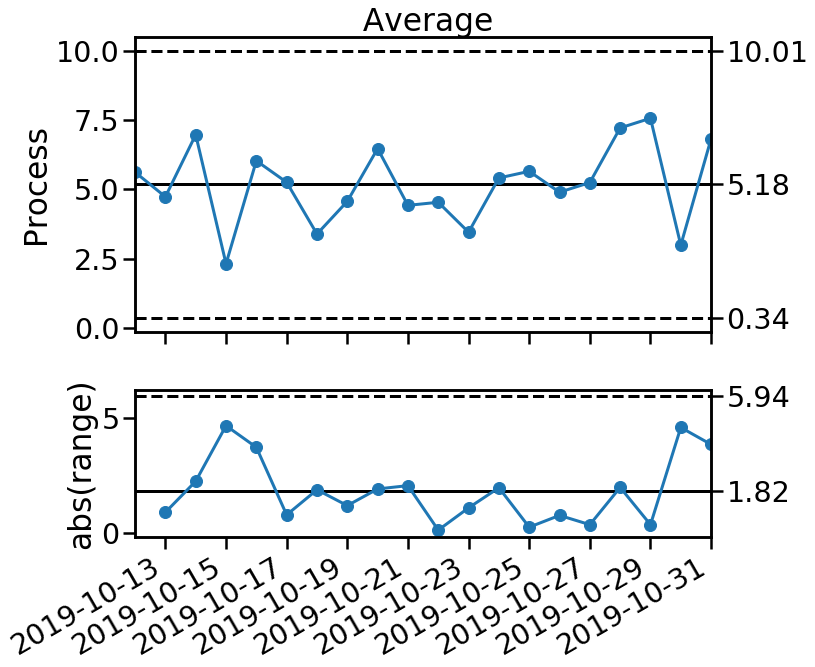

In [4]:
plot_xmr_chart(dataframe=df, column="data")

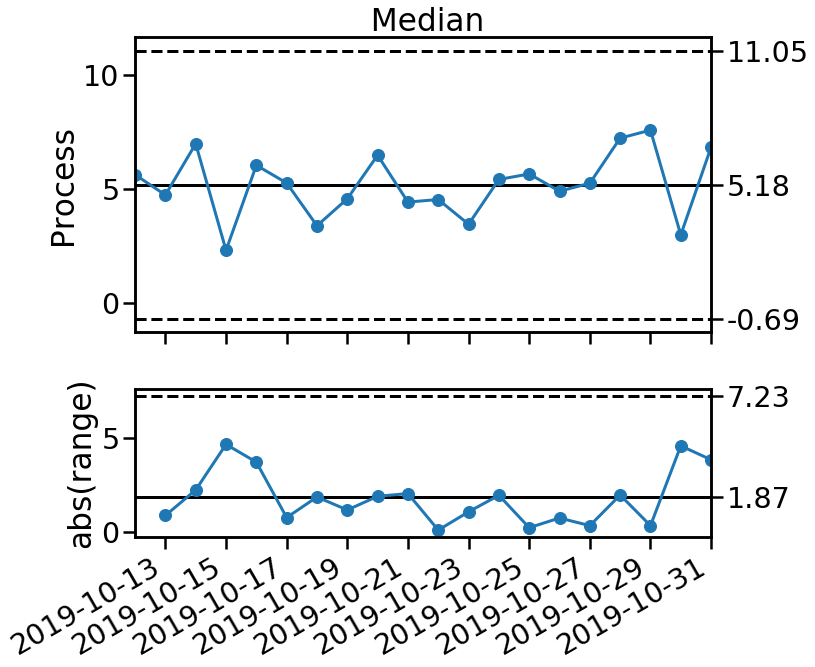

In [5]:
plot_xmr_chart(dataframe=df, column="data", method='median')